<a href="https://colab.research.google.com/github/thual/MeldeExponentielle/blob/main/Melde_exponentielle_matrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 19/12/2022, version 12/12/2023.*
*Licence CC BY-SA*

# Jeu sérieux : Corde de Melde avec dissipation

Ce "jeu sérieux" permet de faire varier la fréquence d'excitation d'une corde de Melde ansi que l'intensité de la dissipation, due au frottement de la corde dans l'air (ou un autre fluide). Il s'agit de déterminer expérimentalement l'amplitude d'oscillation de la corde en réponse au forçage et en présence de dissipation. Les fréquences de résonnance correspondent aux amplitudes de réponses maximale.

La séquence est structuré à l'aide de questions dont les réponses pourront être rédigées dans une copie de ce Jupyter Notebook et remise en téléversant le nouveau fichier ainsi créé dans un dépôt (par exemple sur un compte GitHub).  


**Références :**

*   O. Thual, Propagation des ondes mécaniques : micro-contenus, projet UNIT-PUNCHY (2022) : "[cordes tendues](https://moodle.luniversitenumerique.fr/course/view.php?id=171))"

*   O. Thual,  : "[Propagation des ondes mécaniques](http://www.olivier-thual.fr/221016)"

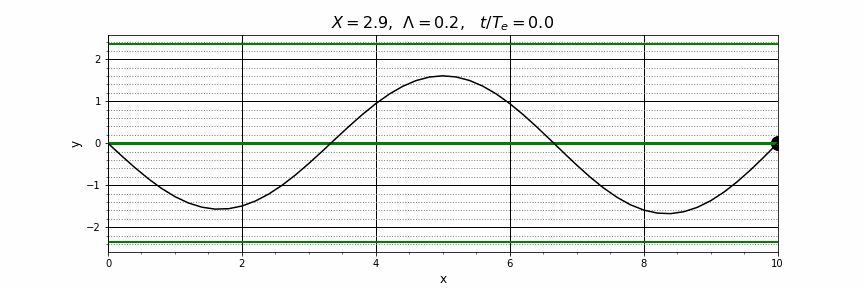

# Équations de d'Alembert avec forçage et dissipation

Les petits déplacements transversaux $y(x,t)$ d'une corde tendue de masse linéique $\mu$ et de tension $T$ sont régis par l'équation de d'Alembert avec dissipation
$${\partial^2 y\over\partial t^2} + \lambda \, {\partial y\over\partial t} = c^2 {\partial^2 y\over\partial x^2}\; $$
où $c=\sqrt{T/\mu}$ est la vitesse de propagation des ondes et $\lambda$ un paramètre qui rend compte des frottements de l'air.

On considère ici les conditions aux limites :
$$ y(0,t) =0 \quad\hbox{et} \quad y(L,t) = a\, \sin(\omega_e\, t)\;,$$
où $a$ est l'amplitude du forçage et $\omega_e$ sa pulsation. On note $y_{max}$ l'amplitude maximale de l'oscillation de la corde après dissipation des transitoires issus des conditions initiales $y(x,0)=y_0(x)$ et ${\partial y\over \partial t}(x,0)=v_0(x)$.

Dans ce "jeu sérieux", on souhaite mesurer $y_{max}$ à l'aide d'une simulation numérique du modèle pour différentes valeurs de $\omega_e$ et du paramètre de dissipation $\lambda$.

**Question 1.**  
Quelles sont les unités des constantes $\lambda$ et $c$ ? Tapez votre réponse en utilisant $\LaTeX$ !

**Réponse 1.**

*Rédigez votre réponse ici !*



# Compilation des sous-programmes

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !    

*  Colab : ⌘/Ctrl+F9 pour tout exécuter.
*  MyBinder : -> Run -> "Run all cells"

In [1]:
# Import de librairies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.embed_limit'] = 2**128 # Taille mémoire

# Sous programmes
def u(t):
    # Forçage en x=L
    return a*np.sin(ome*t)

def init():
    # Première image pour le gif animé
    global t
    y=y0 # Condition initiale
    line.set_data(x,y)
    ax.set_xlim(0,L); ax.set_ylim(-ymax,ymax)
    ax.set_xlabel("x",fontsize=12);
    ax.set_ylabel("y",fontsize=12)
    return line,

def animate(m):
    global t, Xn, Xnp, titre
    # Préparation de la figure
    ax.clear()
    ax.minorticks_on()
    ax.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)
    ax.grid(color='black', axis='y', linestyle='-',linewidth=1)
    ax.grid(color='black', axis='x', linestyle='-',linewidth=1)
    ax.set_xlim(0, L); ax.set_ylim(-ymax, ymax)
    ax.plot([0,L],[0,0],"green",linewidth=3)
    ax.set_xlabel("x",fontsize=12);ax.set_ylabel("y",fontsize=12)
    ax.plot([0,L],[0,0],"green",linewidth=3)
    ax.set_xlabel("x",fontsize=12);ax.set_ylabel("y",fontsize=12)
    # Courbes bleues en premier
    for i in range(Nblue+1):
        # Ntblue nombre de pas de temps entre deux courbes bleues
        for j in range(Ntblue):
            t=t+dt;
            Xnp=np.dot(expLIN,Xn) # Avance temporelle
            Xnp[N]=u(t) # Condition à la limite x=L
            Xn=Xnp.copy(); # Nouveau devient ancien
            y=Xn[0:Np] # Profil y(t)
        ax.plot(x,y,"blue") # Tracé de la courbe bleue
    # Tracé du titre de la figure
    tsTe=round(t/Te,2)
    titre=r"$X=$"+str(round(X,2))+r",  $\Lambda=$"+ \
        str(round(La,3))+r",   ${t}/{T_e}=$"+str(tsTe)
    ax.set_title(titre,fontsize=16)
    # Courbe rouge = solution simulée
    y=Xn[0:Np]
    #print("====== t/Te=",round(t/Te,2))
    ## Pour le gif animé
    line.set_data(x,y) # Courbe rouge gif animé
    line.set_color("red") # Courbe rouge gif animé
    ax.scatter(L,u(t),marker='o',color="black",s=200) # x=L
    ax.set_title(titre,fontsize=16) # Titre gif animé
    ax.minorticks_on() # Pour la grille gif animé
    ax.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)
    # Courbe noire = solution analytique
    ## Pour le gif animé
    ax.plot(x,0*x+YmLaX,"green",linewidth=2) # Asymptotique maximum
    ax.plot(x,0*x-YmLaX,"green",linewidth=2) # Asymptotique minimum
    ax.plot(x,yas(t),"black") # Solution analytique
    ax.plot(x,y,"red") # Courbe rouge plot animé
    # Compteur
    print("\r",m,'/',Nim-1,end="",flush=True)
    return

def yas(t):
    # Solution analytique
    yc=yb*np.exp(-1j*ome*t)
    y=np.real(yc)
    return y

def vas(t):
    # Solution analytique
    vc=-1j*ome*yb[1:N]*np.exp(-1j*ome*t)
    v=np.real(vc)
    return v

def expmat(A,M):
    # Exponentionelle de A, matrice MxM
    An=np.identity(M); facn=1; S=An;
    for n in range(0,nexp):
        An=np.dot(An,A)
        S=S+An/facn
        facn=facn*(n+1)
    norm=np.linalg.norm(An/facn)
    #print("expmat, norme=",norm)
    return S

def YmaxLaX(La,X):
    pi=np.pi
    E=(.5+.5*np.sqrt(1+La**2/X**2))**.5
    kL=pi*X*E; aL=.5*pi*La/E
    kLspimud=kL/pi-.5; M=kLspimud.astype(int)
    Y=np.cosh(aL/kL*pi*(.5+M))\
      /np.sqrt(1.e-10+np.cosh(aL)**2-np.cos(kL)**2)
    return Y


# Programme de simulation de la corde de Melde

On note $X=\omega_e/\omega_1$ où $\omega_1 = \pi \, c/L$ est la fréquence du mode fondamental de vibration de la corde lorsque ses deux extrémités sont fixes, en l'absence de dissipation ($\lambda=0$). On note $\Lambda=\lambda/\omega_1$ le paramètre de dissipation adimensionné.

Il s'agit le lancer de programme de simulation de la corde pour différentes valeurs de $\Lambda$ et de $X$ et de mesurer expérimentalement $Y=y_{max}/a$ où $y_{max}$ est l'amplitude maximale de la réponse de la corde après dissipation des transitoires.

**Question 2.**  Lancez le programme ci-dessous sans changer les paramètres puis lancer l'animation (vérifier "connexion") ! Commentez l'animation en identifiant la dissipation des transitoires ! Augmentez le paramètre    `Nperiod` pour que la solution (courbe rouge) soit proche de la solution asymptotique (courbe noire). Quelle valeur de `Nperiod` avez-vous atteinte pour cela ?

**Réponse 2.**

*Rédigez votre réponse plus bas, en-dessous du résultat du programme !*



# Modification des paramètres

Paramètre principal à modifier :

*   `X`: Rapport $X=\omega_e/\omega_1$

Vous pouvez aussi modifier :
*   `La`: Paramètre de dissipation adimensionné $\Lambda=\lambda/\omega_1$
*   `Nperiod`: Nombre de périodes $Te$ simulées
*   `Ianalytic` : =1 pour conditions initiales sans transitoire, nulles sinon

Autres paramètres :
*   `Nblue` : Nombre de courbes bleues intermédiaires (futures)
*   `Nred`: Nombre de figures (courbes rouges)
*   `N`: Nombre de points de grilles
*   `a`: Amplitude du forçage ($a=1$ car le modèle est linéaire)
*   `dtcible`: Pas de temps du schéma numérique (ajusté pour $T_e$)
*   `c`: Vitesse des ondes $c$
*   `L`: Longueur $L$ de la corde
*   `Gifanime`: True pour sauver un fichier animé
*   `nexp`: Nombre de termes pour la série exponentielle de matrice


**Attention** : le programme tourne pendant une minute avant de produire un résultat. Cliquez sur le triangle à gauche du titre de ce paragraphe pour visualiser le projet et les figures qu'il génére !

== Corde de Melde avec dissipation dt/dtcible= 1.0526315789473686
X= 3.8 La= 0.2 Nperiod= 10 N= 50


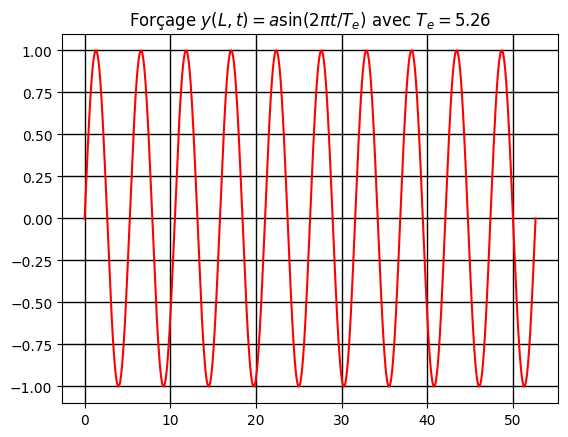

Simulation en cours pour afficher l'animation
Temps d'attente : Nperiod x 10 s =  100 s
 36 / 100

In [ ]:
################################################################
# Principaux paramètres ajustables du programe
X=3.8 # Rapport entre les fréquences du forçage et du fondamental
La=0.2 # Paramètre de dissipation sans dimension (défaut : 0.3)
Nperiod=10; # Nperiod périodes Te=2 pi/omega_e à simuler (défaut : 10)
Ianalytic=0 # =1 pour initialisation avec la solution analytique (défaut : 0)

# Autres paramètres ajustables avec précaution
Nblue=5; # Nblue courbes bleues (défaut : 5, cannot be 0)
Nred=10; # Nred figures (courbes rouges) par période (défaut : 10)
Gifanime=False # True pour sauver un fichier animé

# Autres paramètres à ajuster en sachant pourquoi
N=50; # Nombre de points de grille (défaut : 50)
a=1; # Amplitude du forçage (défaut : 1)
dtcible=.01; # Pas de temps visé pour la stabilité du schéma (défaut : .01)

# Paramètres qu'il est inutile d'ajuster
c=1;  # Vitesse des ondes (défaut : 1)
L=10; # Longueur de la corde (défaut : 10 )
nexp=20 # Nombre de termes pour l'exponentielle de matrice (défaut : 20)

# Parametres dérivés à ne pas changer
om1=np.pi*c/L; ome=X*om1; # Fréquences fondamental et forçage
la=La*om1 # Paramètre de dissipation avec dimension
dx=L/N; dx2=dx**2; usdx2=1/dx2; # Pas d'espace et dérivés
c2=c**2; Np=N+1; Nm=N-1; pi=np.pi; c2sdx2=c2*usdx2;
x=np.linspace(0,L,Np) # Grille spatiale à N+1 points
T0=L/c; Te=2*np.pi/ome; # Periodes temporelles
Mdt=Nblue*Nred; Nte=(int(Te/dtcible)//Mdt)*Mdt;
dt=Te/Nte; dt2=dt**2; usdt=1/dt # Pas de temps et dérivés
Ntblue=int(Nte/(Nblue*Nred)); # Nombre de pas temps entre deux bleues
Nim=Nred*Nperiod+1 # Nombre d'images
YmLaX=a*YmaxLaX(La,X) # Valeur maximale analytique
ymax=1.1*YmLaX # Max y figure
print("== Corde de Melde avec dissipation dt/dtcible=",dt/dtcible)
print("X=",X,"La=",La,"Nperiod=",Nperiod,"N=",N)

# Pour la solution analytique asymptotique
eps=la/ome; k0=ome/c;
k=k0*((.5*(1+np.sqrt(1+eps**2)))**.5);
al=k0**2*eps/(2*k)
K=1j*k-al
B=a*1j/(np.exp(K*L)-np.exp(-K*L))
## Profil à multiplier par exp(-i omega t)
yb=B*(np.exp(K*x)-np.exp(-K*x))

# condition initiale
t=0; y0=np.zeros(Np); v0=np.zeros(N-1);
if Ianalytic==1: y0=yas(t); v0=vas(t);
Xn=np.concatenate((y0,v0)); Xnp=Xn.copy();

# Tracé du signal de forçage
time=np.linspace(0,Nperiod*Te,Nperiod*100); utime=u(time);
plt.plot(time,utime,"red")
plt.title(r"Forçage $y(L,t)=a\sin(2\pi t/T_e)$ avec $T_e=$"\
          +str(round(Te,2)))
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)
plt.show()

# Matrice linéaire pour l'exponentielle
LIN=np.zeros([2*N,2*N])
## Bloc L12
for i in range(1,N):
    LIN[i,Np+i-1]=1
## Bloc L21
for j in range(0,N-1):
    i=Np+j
    LIN[i,j]=c2sdx2; LIN[i,j+1]=-2*c2sdx2; LIN[i,j+2]=c2sdx2
## Bloc L21
for k in range(1,N):
    LIN[N+k,N+k]=-la
## Matrice exp(LIN)
expLIN=expmat(LIN*dt,2*N)

# Animation sur la console et fichier gif animé
fig=plt.figure(figsize=(12,4))
ax = plt.subplot(1,1,1)

line,= ax.plot([], [], linewidth=3)
ani=animation.FuncAnimation(fig,animate,init_func=init,frames=Nim,interval=200)
namefich="X"+str(round(X,2))+"_La"+str(round(La,3))\
     +"_Init="+str(Ianalytic)+"_melde.gif"

if Gifanime:
  print("=======================================================")
  print("Création du fichier animé")
  print("Temps d'attente : N x 10 s = ",N*10,"s")
  ani.save(namefich, writer='pillow')
  print("Corde de Melde : voir le fichier animé :",namefich)

# Visualiser l'animation
print("=======================================================")
print("Simulation en cours pour afficher l'animation")
print("Temps d'attente : Nperiod x 10 s = ",Nperiod*10,"s")

plt.close()
plt.rc('animation', html='jshtml')

# Réinitialisation de la condition initiale
Xn=np.concatenate((y0,v0)); Xnp=Xn.copy(); # Condition initiale
# This line must be the last one to visualize the animation
ani

**Question 2.**  Commentez l'animation en identifiant la dissipation des transitoires ! Quelle valeur de `Nperiod` avez-vous obtenue pour atteindre la solution asymptotique ?

**Réponse 2.**
*Rédigez votre réponse ici !*


In [ ]:
# Création d'un fichier Gifanime
ani.save(namefich, writer='pillow')

# Expériences numériques multiples

Il s'agit ici de faire tourner le code précédent en variant la fréquence d'excitation ($X$ : `X`) et la dissipation ($\Lambda$ : `La`). Un programme Python est fourni pour saisir et visualiser les valeurs expérimentale de l'amplitude maximale ($Y$ : `Y`).


**Question 3.**  
En choisissant $\Lambda=0.25$, remplissez le tableau en ajoutant des lignes :
`i+=1; Xe[i]=1.9; Ye[i]=2.4`
où `Xe` contient des valeurs de $X$ que vous choisirez dans le programme de simulation de la corde de Melde ci-dessous et `Ye` les valeurs de $Y$ que vous estimerez en observant les animations (visibles en allant à la dernière figure en cours). Réalisez au moins dix simulations ! Une fois le tableau rempli, exécutez le programme ci-dessous pour tracer la courbe de réponse $Y$ en fonction de $X$ !

**Réponse 3.**
*Insérez la nouvelle figure ci-dessous ! (voir les fichiers dans la colonne de droite)*

In [ ]:
# Import de librairies
import numpy as np
import matplotlib.pyplot as plt

def YLaXX(La,color):
    pi=np.pi
    Xmin=0.5; Xmax=4;
    Ymin=1; Ymax=3.3
    XX=np.linspace(Xmin+1.e-10,Xmax,500)
    plt.figure(1,figsize=(11,3))
    ## Courbe théorique sans dissipation
    Ythe=np.abs(1/(1.e-10+np.sin(pi*XX)))
    plt.plot(XX,Ythe,"blue",linestyle='--',linewidth=2)
    plt.xlim(Xmin,Xmax)
    plt.ylim(Ymin,Ymax)
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)
    plt.title("Réponse $Y=y_{max}/a$ en fonction $X=\omega_e/\omega_1$"+\
    " pour des valeurs de $\Lambda=\lambda/\omega_1$")
    print("Tracé de la courbe La=",np.round(La,2),"avec la couleur :",color)
    E=(.5+.5*np.sqrt(1+La**2/XX**2))**.5
    kL=pi*XX*E; aL=.5*pi*La/E
    kLspimud=kL/pi-.5; M=kLspimud.astype(int)
    Y=np.cosh(aL/kL*pi*(.5+M))\
      /np.sqrt(1.e-10+np.cosh(aL)**2-np.cos(kL)**2)
    plt.plot(XX,Y,color)
    return

# Paramètre
nemax=100; # Nombre maximal de valeurs expérimentales saisies

# Tracé des courbes Y en fonction de X pour des valeurs de La : noir
print("Courbes noires pour plusieurs valeurs de La")
for La in np.linspace(.1,.5,5):
    YLaXX(La,"black")

# Première expérience pour un choix de La : en rouge
#####################
coLa="red"
Laexpe=.3; # Changer en la valeur choisie
print("\n Expérience Rouge : Valeur choisie La=",Laexpe)
YLaXX(Laexpe,coLa) # Tracé de Y analytique pour ce La
Xe=np.zeros(nemax); Ye=np.zeros(nemax); i=0

## Changer les valeurs ci-dessous avec les valeurs mesurées
i+=1; Xe[i]=0.6; Ye[i]=1.05
i+=1; Xe[i]=0.7; Ye[i]=1.15
i+=1; Xe[i]=0.8; Ye[i]=1.40
i+=1; Xe[i]=0.9; Ye[i]=1.90
i+=1; Xe[i]=1.0; Ye[i]=2.15
i+=1; Xe[i]=1.1; Ye[i]=1.75
i+=1; Xe[i]=1.2; Ye[i]=1.3
i+=1; Xe[i]=1.3; Ye[i]=1.10
i+=1; Xe[i]=1.5; Ye[i]=1.00
i+=1; Xe[i]=1.7; Ye[i]=1.2
i+=1; Xe[i]=1.8; Ye[i]=1.45
i+=1; Xe[i]=1.9; Ye[i]=1.90
i+=1; Xe[i]=2.0; Ye[i]=2.2
i+=1; Xe[i]=2.1; Ye[i]=1.8
i+=1; Xe[i]=2.2; Ye[i]=1.4
i+=1; Xe[i]=2.3; Ye[i]=1.1
i+=1; Xe[i]=2.5; Ye[i]=1.0


## Tracé de l'expérience rouge
for j in range(i+1):
    plt.scatter(Xe[j],Ye[j],marker='o',color=coLa,s=20)
plt.savefig("MesExperiences.png")

# Deuxième expérience pour un choix de La : en vert
#####################
coLa="green"
Laexpe=.2; # Changer en la valeur choisie
print("\n Expérience verte : Valeur choisie La=",Laexpe)
YLaXX(Laexpe,coLa) # Tracé de Y analytique pour ce La
Xe=np.zeros(nemax); Ye=np.zeros(nemax); i=0

## Changer les valeurs ci-dessous avec les valeurs mesurées
i+=1; Xe[i]=1; Ye[i]=3.2
i+=1; Xe[i]=1.1; Ye[i]=2.1
i+=1; Xe[i]=1.2; Ye[i]=1.5
i+=1; Xe[i]=1.3; Ye[i]=1.15
i+=1; Xe[i]=1.5; Ye[i]=1.
i+=1; Xe[i]=1.7; Ye[i]=1.2
i+=1; Xe[i]=1.8; Ye[i]=1.6
i+=1; Xe[i]=1.9; Ye[i]=2.4
i+=1; Xe[i]=2.0; Ye[i]=3.15
i+=1; Xe[i]=3.0; Ye[i]=3.2
i+=1; Xe[i]=3.1; Ye[i]=2.3
i+=1; Xe[i]=3.2; Ye[i]=1.5
i+=1; Xe[i]=3.3; Ye[i]=1.2
i+=1; Xe[i]=3.5; Ye[i]=1.
i+=1; Xe[i]=3.7; Ye[i]=1.2
i+=1; Xe[i]=3.8; Ye[i]=1.6
i+=1; Xe[i]=3.9; Ye[i]=2.2
i+=1; Xe[i]=4.0; Ye[i]=3.15

## Tracé de l'expérience verte
for j in range(i+1):
    plt.scatter(Xe[j],Ye[j],marker='o',color=coLa,s=20)

# Troisième valeur de La : recopier et changer la couleur

# Finalisation de la figure
plt.savefig("MesExperiences.png")
plt.show()


**Question 4.**   
Recommencez la série d'expérience en choisissant une autre valeur de $\Lambda$ dans l'intervalle $[0.1; 0.5]$ ! Exécutez de nouveau le programme et récupérez la figure générée (icône répertoire à gauche pour faire apparaitre la liste des fichiers)  !


**Réponse 4.**
*Insérez la nouvelle figure ci-dessous ! (voir les fichiers dans la colonne de droite)*

# Commentaires sur la dissipation

Le paramètre $\lambda$ introduit de la dissipation d'énergie. Même en posant $\lambda=0$ (`La=0` dans le programme) le schéma numérique introduit une dissipation artificielle. À cause la dissipation, les ondes observées ne sont pas exactement stationnaires : l'onde réfléchie en $x=0$ n'a pas la même amplitude $a$ que l'onde incidente émise par l'oscillation forcée de la corde en $x=L$.

D'un autre côté, la dissipation est nécessaire pour supprimer, petit à petit, le transitoire que génère la condition initiale $y(x,0)=0$ et ${\partial y \over \partial t}(x,0)=0$. Ce transitoire est responsable du caractère propagatif de l'onde au début de la simulation. On peut initialiser le programme avec la solution asymptotique, c'est-à-dire la solution obtenue après dissipation des transitoires, que l'on peut exprimer analytiquement.


Une expérience soigneuse consisterait à poser $\lambda=0$ et à diminuer le pas de temps (`dtcible`) pour diminuer la dissipation numérique. Une telle expérience est couteuse dans dans la mesure où il faut effectuer un grand nombre de pas de temps pour un temps donné mais aussi simulation sur des temps plus longs pour faire disparaitre les transitoires.

**Question 5.**  
À partir de l'observation des simulations, comment est modifié le comportement des noeuds lorsque les amplitudes des ondes ne sont pas exactement identiques ?

**Réponse 5.**
*Rédigez votre réponse ici!*


**Question 6.**  
Pourquoi les ondes transitoires finissent-elle par disparaitre, même lorsque `la=0` dans le programme ?

**Réponse 6.**
*Rédigez votre réponse ici!*


**Question 7 à 14**
*Les questions 7 à 14 sont facultatives.*

# COMPLÉMENT n°1 : Solution asymptotique

Ce complément détaille les calculs qui permettent d'obtenir l'expression analytique de la solution asymptotique tracée dans le programme. Cette solution est celle qui subsiste après dissipation des transitoires.  

*  Recherche de la solution asymptotique
*  Amortissement spatial de la solution asymptotique
*  Expression analytique de la solution asymptotique
*  Expression adimensionnée de la solution asymptotique
*  Amplitude maximale de la solution asymptotique





## Recherche de la solution asymptotique

On cherche une solution particulière $y_a(x,t)$ de l'équation ${\partial^2 y\over\partial t^2} + \lambda \, {\partial y\over\partial t} = c^2 {\partial^2 y\over\partial x^2}$ avec les conditions limites $y(0,t)=0$ et $y(L,t)=a\, \sin(\omega_e\,t)$. Les solutions générales sont de la forme $y(x,t) = y_a(x,t) + y_h(x,t)$ où $y_h(x,t)$ est une solution homogène de l'équation avec les conditions aux limites $y_h(0,t) = y_h(L,t)=0$. En présence d'une dissipation $\lambda >0$ non nulle, la solution homogène temps vers zéro. La solution particulière $y_a(x,t)$ est donc la solution asymptotique qui subsiste lorsque la dissipation à éliminé tous les transitoires.  


**Question 7.**  
Pourquoi peut-on superposer les solutions $y_a$ et $y_h$ ?



## Amortissement spatial de la solution asymptotique

On cherche la solution asymptotique comme la partie réelle  $y_a(x,t) = \Re[\underline y_a(x,t)]$ d'une solution complexe de la forme :
$$ \underline y_a (x,t)= [B_+\exp( K \, x) -  B_-\exp(-K\,x)] \,e^{-i\,\omega_e \,t}$$
avec $K= i\,k - \alpha$, où $B_+$ et $B_-$ sont des amplitudes complexes. En reportant dans l'équation des ondes amorties ${\partial^2 y\over\partial t^2} + \lambda \, {\partial y\over\partial t} = c^2 {\partial^2 y\over\partial x^2}\; $, on obtient la relation de dispersion généralisée qui permet de déterminer $k$ et $\alpha$ :
$$ -\omega_e^2 - i\, \lambda\, \omega_e - c^2 (i\, k - \alpha)^2=0\;.$$
On en déduit que $k^2-\alpha^2 =k_e^2$ et $2\, k \, \alpha =\epsilon\, k_e^2$ avec $k_e = \omega_e/c$ et $\epsilon = \lambda/\omega_e$. La résolution de ce système conduit à
$$k=k_e\, E^{1/2}\quad \hbox{et} \quad \alpha={\epsilon\over 2} {k_e^2\over k} = {\epsilon\over 2} k_e \,E^{-1/2}\quad \hbox{avec} \quad E={1\over 2} \left(1+\sqrt{1 + \epsilon^2}\right)\;. $$


**Question 8.**  
Trouvez $(k,\alpha)$ solution du système  $k^2-\alpha^2 =k_e^2$ et $2\, k \, \alpha =\epsilon\, k_e^2$.




## Expression analytique de la solution asymptotique

En $x=0$, la condition à la limite $y_a(0,t)=0$ entraine $B_+ = B_- = B$.
Comme la condition à la limite en $x=L$ s'écrit $y(L,t) = \Re \left[i\, a \, \exp(-i\, \omega_e \, t\right]$, la solution asymptotique doit vérifier $\underline y_a(L,t) = i\, a \exp(-i\, \omega_e\,t)$ ce qui entraine :
$$ B=  {a \, i \over \exp( K \, L) -  \exp(-K\,L)} =
{a\, i \over  2\, \sinh(i\,k\, L - \alpha\, L) } ={ a/2 \over  \sin(kL) \, \cosh(\alpha L) + i\, \cos(kL)\, \sinh(\alpha L)}$$
La solution asymptotique complexe s'écrit donc
$ \underline y_a(x,t) =y_b(x) \, \exp(-i\,\omega_e\,t)$ avec
$$ y_b(x) = a \, i { \exp( K \, x) -  \exp(-K\,x)\over \exp( K \, L) -  \exp(-K\,L)} = a \, i {\sin(kx) \, \cosh(\alpha x) + i\, \cos(kx)\, \sinh(\alpha x) \over \sin(kL) \, \cosh(\alpha L) + i\, \cos(kL)\, \sinh(\alpha L)}\;.$$


**Question 9.**  
Calculez les parties réelles et imaginaires de $\sinh(K\,x)$ pour $K=ik - \alpha$.  


**Question 10.**  
Exprimer la solution réelle $y_a(x,t)$ pour $\lambda =0$. Que se passe-t-il si $\omega_e = n\, \omega_1$ avec $n$ entier positif ?





## Expression adimensionnée de la solution asymptotique

On cherche à exprimer la solution asymptotique en adimensionnant toutes les grandeurs. On note ainsi :
*   $X=\omega_e/\omega_1$ : rapport entre la fréquence du forçage et la fréquence fondamentale $\omega_1 = \pi\,c/L$.
*   $\Lambda = \lambda/\omega_1$ : paramètre de dissipation adimensionné
*   $Y=y_{max}/a$ : amplitude maximale adimensionnée
*   $\xi = x/L$ : variable d'espace adimensionnée $\xi \in [0,1]$
*   $\tau = \omega_e \, t$ : variable de temps adimensionnée
*   $\kappa =k\,L$ : nombre d'onde adimensionné
*   $\beta =\alpha\,L$ : taux d'amortissement spatial adimensionné

La solution réelle est donnée par  $y_a(x,t)/a = \Re\left[Y_b(\xi) \exp(-i\,\tau)\right]$ avec :
$$ Y_b(\xi) =  i \,{\sinh(i\kappa \, \xi - \beta \, \xi) \over \sinh(i\kappa   - \beta )} = i \,{ \sin(\kappa \, \xi) \,\cosh(\beta\, \xi) + i \, \cos(\kappa \, \xi)\, \sinh(\beta\,\xi) \over \sin\kappa\, \cosh\beta + i \, \cos\kappa \,\sinh\beta}\;,$$
où $\kappa$ et $\beta$ s'expriment en fonction de $X$ et $\Lambda$ de la manière suivante :
$$ \kappa = \pi\, X\left({1\over 2} + {1\over 2} \sqrt{1+ {\Lambda^2 \over X^2}} \right)^{1/2} \quad \hbox{et} \quad
 \beta = {\pi\, \Lambda \over 2} \left({1\over 2} + {1\over 2} \sqrt{1+ {\Lambda^2 \over X^2}} \right)^{-1/2} \;.$$

**Question 11.**  
Exprimer $Y_b(\xi)$ pour $\Lambda =0$. Que se passe-t-il si $X = n$ avec $n$ entier positif ?

## Amplitude maximale de la solution asymptotique

Le maximum $Y(\Lambda, X)$ de $y_a(x,t)/a$ est obtenu en cherchant le maximum du module $R(\xi) = |Y_b(\xi)|$ qui vérifie:
$$ R^2(\xi) = {\sin^2(\kappa\,\xi) \, \cosh^2(\beta\,\xi) +  \cos^2(\kappa\,\xi) \, \sinh^2(\beta\,\xi) \over \sin^2\kappa \, \cosh^2\beta\ +  \cos^2\kappa\, \sinh^2\beta} = {\cosh^2(\beta\, \xi) - \cos^2(\kappa\, \xi) \over \cosh^2\beta - \cos^2 \kappa} $$
Pour $\Lambda \ll 1$, une approximation du maximum est obtenue en considérant les valeurs de $\xi$ telles que $\cos(\kappa\, \xi) =0$. Ce sont les $\xi_m = {\pi\over \kappa} ({1\over 2} +m )$ avec $m$ entier tel que $m \le {\kappa\over \pi} -{1\over 2}$. On a donc
$$ Y(\Lambda, X) = {\cosh\left[{\beta\, \pi \over \kappa}  \left({1\over 2} + M\right)\right] \over \sqrt{ \cosh^2 \beta - \cos^2 \kappa}} \quad \hbox{avec} \quad M = E\left({\kappa \over \pi} -{1\over 2} \right)\;$$
où $E()$ désigne la partie entière. On note que le maximum est au moins égal à cette valeur particulière.

**Question 12.**  
Tracez la courbe $Y(0,X)$ en fonction de $X$ ?

# COMPLÉMENT n°2 : Méthode numérique

Ce complément explique la méthode numérique utilisée dans le programme. Le schéma temporel utilise la notion d'exponentielle de matrice. Cette méthode permet de choisir des pas de temps suffisament grand pour diminuer les temps de calculs.

*   Transformation en un système du premier ordre
*   Schéma temporel avec exponentielle de matrice



## Transformation en un système du premier ordre

On transforme tout d'abord l'équation du second ordre en temps ${\partial^2 y\over\partial t^2} + \lambda \, {\partial y\over\partial t} = c^2 {\partial^2 y\over\partial x^2}\; $ en un système du premier ordre
$$ \left\{\begin{matrix}
{\partial y \over \partial t} & = & v \;,\cr
{\partial v \over \partial t} & = &  c^2 {\partial^2 y\over\partial x^2}-\lambda \, v \;. \end{matrix}\right. $$
On discrétise alors l'espace en $N+1$ points de grilles d'abscisses $x_i=i \, \delta x$ avec $\delta x=L/N$, pour $i=0,1...N$. On définit alors les $N+1$ valeurs $y_i(t) = y(x_i,t)$ pour $i=0,1...N$ et les $N-1$ valeurs $v_i(t) = v(x_i,t)$ pour $i=1,2...N-1$. En choisissant une schéma aux différences finites pour ${\partial^2 y\over\partial x^2}$, le système discrétisé s'écrit:
$$ \left\{\begin{matrix}
\dot y_i  & = & v_i &\quad \hbox{pour $i=0,1...N$} \;,\cr
\dot  v_i & = &  {c^2\over \delta x^2} (y_{i+1} -2 \, y_i + y_{i-1})-\lambda \, v_i &\quad \hbox{pour $i=1,2...N-1$} \;. \end{matrix}\right. $$

On réunit les $y_i$ et les $v_i$ en un seul vecteur $\underline X(t)\in \mathbb R^{2N}$ de composantes $X_i=y_i$ pour $i=0,1...N$ et $X_{N+i}=v_i$ pour $i=1,2...N-1$. Le système s'écrit alors $\dot{\underline X} = \underline{\underline L} \, \underline X$ où $\underline{\underline L}$ est un matrice $(2N) \times (2N)$ de composantes :
$$ \left.\begin{matrix}
L_{i,N+i} = 1 \;,\cr
\left(\begin{matrix}
L_{N+i,i-1}\cr L_{N+i,i}\cr L_{N+i,i+1}\end{matrix}\right)
 = \displaystyle{c^2\over \delta x^2}
 \left(\begin{matrix} 1 \cr -2 \cr 1\end{matrix}\right)
 \;,\cr
L_{N+i,N+i}= -\lambda \;,\end{matrix}\right\}
\left.\begin{matrix}
\cr
\hbox{pour $i=1,2...N-1$} \;, \cr
\hbox{et $L_{kl} =0$ sinon.}\end{matrix}\;\right.$$

**Question 13.**  
Dessinez la matrice $\underline{\underline L}$.

## Schéma temporel avec exponentielle de matrice

Le schéma temporel consiste alors à discrétiser le temps avec $t_n = n\, \delta t$ pour $n\in \mathbb N$ en notant $\underline X^n = \underline X(t_n)$ et en écrivant:
$$ X^{n+1} = \exp \left(\underline{\underline L}\, \delta t\right) \, \underline X^n \quad \hbox{où} \quad  \exp\left(\underline{\underline A}\right) = \sum_{n=0}^{\infty} {1\over n!} \underline{\underline A}^n\;.$$
En pratique, on approxime l'exponentielle de la matrice $\underline{\underline A} = \underline{\underline L}\, \delta t$ par une somme tronquée à un nombre fini de terme.

Si la condition initiale vérifie $y_0=0$, cette condition aux limites en $x=0$ reste vérifiée  pour tous les pas de temps. Il suffit alors d'imposer $y_N^n = a\, \sin(\omega_e \, t_n)$ à chaque pas de temps pour satisfaire la condition aux limites en $x=L$. Cette condition aux limites empêche de choisir des pas de temps trop grands, qui génèrent sinon des instabilités numériques.

**Question 14.**  
Vérifier que  $\underline X(t) = \underline X(0) \exp\left(\underline{\underline L}\, t\right)$ est solution de l'équation $\dot{\underline X} = \underline{\underline L} \, \underline X$
